<h1 style='color: green; font-size: 30px; font-weight: bold;'>Data Science - Regressão Linear: de baixo dos panos</h1>

# 1.1 Conhecendo o Dataset

## Importando o numpy, pandas e random

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(42)

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso dataset é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel;</li>
    <li><b>Area</b> - Área do imóvel em m².</li>
</ul>

In [2]:
try:
    dados = pd.read_csv('data/dados_imoveis.csv',sep=';')
except:
    dados = pd.read_csv('https://raw.githubusercontent.com/BrunoASNascimento/ml_study/master/data/dados_imoveis.csv',sep=';')    

In [3]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [4]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

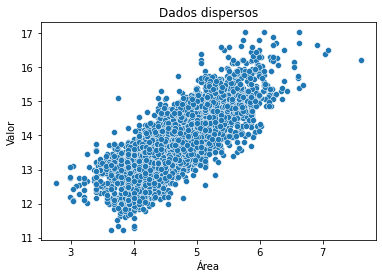

In [6]:
ax = sns.scatterplot(x=area, y=valor)

ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

Podemos então definir uma hipótese a partir das constantes $\alpha$ e $\beta$ tal que:

$$y_i = \theta_1 x_i + \theta_0 + \epsilon_i$$

Sendo $y_i$ é o valor de um determinado imóvel, $x_i$ é a área deste mesmo imóvel e o termo $\epsilon_i$ é o termo de erro (esperamos que pequeno) representando que existem fatores não levados em consideração para este modelo simples.

Supondo que temos $\theta_1$ e $\theta_0$, podemos fazer uma previsão através facilmente.

In [7]:
def prever(theta0, theta1, x_i):
    return theta1*x_i + theta0 

Como vamos escolher as constântes $\theta_0$ e $\theta_1$?

Sabendo que podemos calcular a saída prevista com a função "prever" e sabendo qual é a saída real, é possível calcularmos o erro de cada previsão fazendo a diferença entre a saída real e a saída prevista.

In [8]:
def erro(theta0, theta1, x_i, y_i):
    return y_i - prever(theta0, theta1, x_i)

No entanto esta função de erro calcula apenas o erro de uma saída, e não de todas elas. Ainda que podemos ter uma saída com erro positivo cancelando uma outra saída com erro negativo. Então, devemos somar todos os erros e elevá-los ao quadrado para que todos erros sejam positivos.

$$
EQM = \frac{1}{N}\sum^{N}_{i=0}(y_i - y^p_i)^2
$$

In [9]:
def soma_erro_quadratico_medio(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto,y)]).mean()

Agora podemos ver a regressão como um problema de otimização. Devemos minimizar esta função de soma dos erros quadráticos. Isto é um problema conhecido na algebra linear como minímos quadrados e sua resolução dá as equações:

$$\theta_1 = correlacao(x, y) \times \frac{\sigma(y)}{\sigma(x)}$$

$$\theta_0 = \bar{y} - \alpha\bar{x}$$

Sendo $\bar{x}$ e $\bar{y}$ as médias dos valores de x e y, correlação(x, y) é a correlação entre os valores de x e y, e $\sigma(x)$, $\sigma(y)$ os desvios padrões de x e y.

Assim, vamos definir uma função para minimizar os valores de $\theta_1$ e $\theta_0$. 

In [10]:
def minimos_quadrados(x, y):
    theta1 = np.corrcoef(x,y)[0,1] * y.std() / x.std()
    theta0 = y.mean() - theta1 * x.mean()
    return theta1, theta0

Agora sim, podemos escolher valores para $\theta_0$ e $\theta_1$ e fazer nossa regressão!

In [11]:
theta1, theta0 = minimos_quadrados(area, valor)

In [12]:
print(theta1)
print(theta0)

1.273136797389051
7.806465474455786


Para avaliar se nossa regressão está de fato representando o que queremos, vamos verificar na função de erro:

In [13]:
soma_erro_quadratico_medio(prever(theta0, theta1, area), valor)

0.2922746317391325

## Visualizando nossos resultados de forma gráfica

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

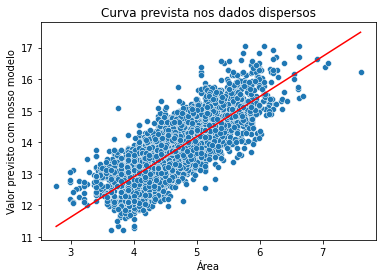

In [15]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1, area), color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

Uma das métricas mais utilizadas é a $R^2$ também conhecida como coeficiente de determinação.

Esta métrica varia entre 0 e 1, indicando, em percentagem quanto o modelo consegue explicar nossos dados. Quanto maior o $R^2$, mais explicativo é nosso modelo, ou seja mais ele se ajusta ao conjunto de dados utilizado.

Podemos dizer o quanto nosso modelo é explicativo através da variância de nosso valores de y, ou seja comparando as variâncias dos valores de imóveis previstos e a variância utilizando o valor real do imóveis.

$$
R^2 = 1 - \frac{\sum^{N}_{i=0}(y_i - y^p_i)^2}{\sum^{N}_{i=0}(y_i - y_i)^2}
$$


In [16]:
def r_2(y_previsto, y):
    
    variancia_prevista = sum([(y[i] - y_previsto[i]) ** 2 for i in range(len(y))])
    variancia_original = sum([(y[i] - y.mean()) ** 2 for i in range(len(y))])
    
    return 1 - variancia_prevista / variancia_original

In [17]:
r_2(prever(theta0, theta1, area), valor)

0.641975652487156

Quanto custa um apartamento de 72$m^2$?

In [18]:
np.exp(prever(theta0, theta1, np.log(72)))

568778.5698688689

# Limitações do métodos dos minímos quadrados:

Quando nosso problema não envolve apenas uma variável independente, pode ser que o método dos quadrados mínimos fique muito caro do ponto de vista computacional. Note que apenas resolvemos este problema para uma variável (área), e se houvessem mais? Teriamos de refazer todas nossas contas usando algebra matricial.

A fórmula que determina os coeficientes da regressão seria:

$$
\Theta = (X'X)^{-1}X'y
$$

Existe uma procedimento de inversão matricial envolvido, o que é muito caro computacionalmente O($n^3$). Quando nosso conjunto de dados é muito grande e possuí muitas variáveis, um método iterativo, como o Gradiente Descendente pode ser mais eficiente.

# Regressão linear com o Gradiente Descendente

O método do gradiente descendente é um método de otimização iterativo e não analítico como o mínimos quadrados. A ideia deste método é utilizar o gradiente da função a ser otimizada para indicar o sentido de minimização da função. Em geral, as bibliotecas prontas de Machine Learning usam este método para otimizar seus modelos.

Começamos com valores aleatórios para nosso parâmetros $\theta_1$ e $\theta_0$ e iterativamente vamos atualizando seus valores usando o gradiente da função de custo (erro quadrático médio).

Agora podemos ver a regressão como um problema de otimização. Devemos minimizar esta função de soma dos erros quadráticos. Para isto, vamos utilizar a técnica do gradiente descendente. Primeiramente, vamos definir a derivada da função de custo em relação a $\theta_1$ e $\theta_0$.

$$
\frac{\delta}{\delta\theta_0}EQM = \frac{2}{N}\sum^{N}_{i=0}y(x_i) - y_i
$$

$$
\frac{\delta}{\delta\theta_1}EQM = \frac{2}{N}\sum^{N}_{i=0}(y(x_i) - y_i)x_i
$$

In [19]:
def derivada(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    
    for x_i, y_i in zip(X, y):
        dtheta0 += prever(theta0, theta1, x_i) - y_i
        dtheta1 += (prever(theta0, theta1, x_i) - y_i)*x_i

    dtheta0 /= 0.5*len(X)
    dtheta1 /= 0.5*len(X)

    return dtheta0, dtheta1

In [20]:
def derivada(theta0, theta1, X, y):

    dtheta0 = 2*np.array([prever(theta0, theta1, x_i) - y_i for x_i, y_i in zip(X, y)]).mean()
    dtheta1 = 2*np.array([(prever(theta0, theta1, x_i) - y_i)*x_i for x_i, y_i in zip(X, y)]).mean()

    return dtheta0, dtheta1

Agora queremos realizar o processo de otimização de nossa função de custo. Para isto, vamos atulizar o valor de nossas variáveis $\theta_0$ e $\theta_1$. Vamos criar um parâmetro novo para nosso algoritmo, vamos chamá-lo de taxa de aprendizado ($\alpha$), será um número pequeno para dizer o quanto queremos atualizar nossos parâmetros.

$$
\theta_0 = \theta_0 - \alpha\frac{\delta}{\delta\theta_0}EQM
$$

$$
\theta_1 = \theta_1 - \alpha\frac{\delta}{\delta\theta_1}EQM
$$

In [21]:
def gradienteDescendente(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = derivada(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

Finalmente, vamos inicializar nosso valores iniciais aleatóriamente e executar o gradiente descendente várias vezes.

In [22]:
theta0 = random.random()
theta1 = random.random()
    
for i in range(10000):
    if i % 1000 == 0:
        print(soma_erro_quadratico_medio(prever(theta0, theta1,area), valor))
    theta0, theta1 = gradienteDescendente(theta0, theta1, area, valor, 0.01)

168.22116350027565
0.6593029559163834
0.49986004915533633
0.4096816618926126
0.3586781917821899
0.3298314354554666
0.31351616614591205
0.30428850776975325
0.2990694900819959
0.29611769619076367


In [23]:
print(theta0)
print(theta1)

7.424430958943951
1.3545668505867476


In [24]:
r_2(prever(theta0, theta1, area), valor)

0.6393131110901085

Quanto custa um apartamento de 72$m^2$?

In [25]:
np.exp(prever(theta0, theta1, np.log(72)))

549883.1690804189

## Visualizando nossos resultados de forma gráfica

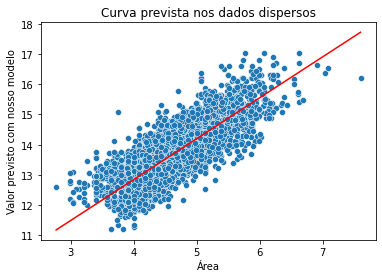

In [26]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1, area), color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

## Comparando com um modelo do sk-learn

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
lr.fit(np.array(area).reshape(len(area),1), valor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

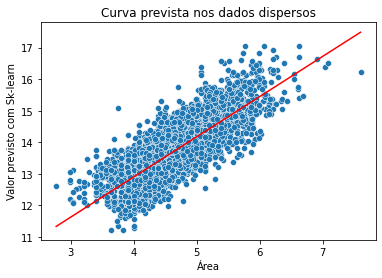

In [29]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = lr.predict(np.array(area).reshape(len(area),1)), color='red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com Sk-learn')
plt.show()

In [30]:
from sklearn.metrics import r2_score

r2_score(valor, lr.predict(np.array(area).reshape(len(area),1)))

0.6419756524871572

# Gradiente descendente vs Mínimos Quadrados

Legal! Utilizando ambos métodos apresentaram resultados semelhantes.

Agora a questão é apenas escolher qual deles usar. Levando em consideração que ambos métodos chegam em um resultado igual ou muito semelhante e que a maior limitação do método dos mínimos quadrados é para grande conjuntos de dados. Podemos dizer que vale a pena utilizar o Gradiente Descendente quando temos muitos dados disponíveis e os mínimos quadrados quando nosso conjunto de dados é menor. 

## E se eu quiser usar mais dados, além da área de um imóvel para calcular seu valor?

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso dataset é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel;</li>
    <li><b>Area</b> - Área do imóvel em m².</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta).</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta).</li>
</ul>

In [32]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [33]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])
dist_Praia = np.log(dados['Dist_Praia'] + 1)
dist_Farmacia = np.log(dados['Dist_Farmacia'] + 1)

valor = np.array(valor)
area = np.array(area)
dist_Praia = np.array(dist_Praia)
dist_Farmacia = np.array(dist_Farmacia)

X = np.array([area, dist_Praia, dist_Farmacia]).T
y = valor

# Regressão multivariável

Desta vez, não temos apenas uma variável. Então, nosso problema vai ficar um pouco maior, em vez de otimizarmos dois parâmetros, devemos otimizar $n+1$ parâmetros, sendo $n$ o número de variáveis do problema. No nosso caso, temos três variáveis no problema, portanto iremos otimizar no total quatro parâmetros. Então nossa hipótese de forma geral será:

$$
y(x_0, x_1, ..., x_n) = \theta_0 + \theta_1 x_0 + \theta_2 x_1 + ... + \theta_{n} x_{n-1}
$$

Como nosso problema possuí três variáveis, teremos:

$$
y(x_0, x_1, x_2) = \theta_0 + \theta_1 x_0 + \theta_2 x_1 + \theta_3 x_2
$$

Podemos definir isto a partir da notação matricial:

$$
y(X) = \theta_0 + X \bullet \theta 
$$

Desta forma, é facil prever usando nosso modelo.

In [34]:
def prever(theta, X):
    return np.dot(X, theta)

Agora, vamos a função de custo. Usaremos o erro quadrático médio.

$$
EQM = \frac{1}{N}\sum_{i=0}^{N}(y_{i}-y_{i}^{p}(x_{i}))^2
$$

Devemos minimizar nossa função de custo, para isto usamos o gradiente descendente. Nele, usamos a derivada de nossa função de custo, definida como:

$$
EQM' = \frac{1}{2N}\sum_{i=0}^{N}(y^{p}_{i}(x_i) - y_{i})x_{i}
$$

In [35]:
def gradienteDescendente(theta, X, y, alpha):
    previsto = prever(theta, X)
    erro = previsto - y
    
    gradiente = np.dot(X.T, erro) / (2*len(X))
    
    theta -= alpha*gradiente

O métoto c_ do numpy vai apenas colocar mais um atributo em todas amostras de nosso conjunto. Este ultimo atributo será sempre unitário, e será responsável pela variável independente $\theta_0$.

Após isto, vamos criar nossos pesos de forma aleatória e executar a nossa otimização.

In [36]:
X = np.c_[np.ones(X.shape[0]), X] 

theta = np.random.rand(X.shape[1])

for i in range(7000):
    previsto = prever(theta, X)
    custo = soma_erro_quadratico_medio(prever(theta, X), y)
    
    if i % 1000 == 0:
        print(custo)
    
    gradienteDescendente(theta, X, y, 0.1)

161.03679807775757
0.4466321061047585
0.2621813837875023
0.19702542867849343
0.1739891393720715
0.1658442254228357
0.16296443351912918


In [37]:
theta

array([ 9.16564662,  1.08810325, -0.47692579,  0.03242912])

In [38]:
r_2(prever(theta, X), y)

0.8016225629213908

Eu tenho um apartamento, de 72$m^2$, a 500$m$ da praia e 100$m$ de uma farmácia, por quanto posso vende-lo?

In [39]:
minha_area = np.log(72)
minha_dist_Praia = np.log(0.5 + 1)
minha_dist_Farmacia = np.log(0.1 + 1)

np.exp(prever(theta, [1, minha_area, minha_dist_Praia, minha_dist_Farmacia]))

829696.2924278222

# Comparando com o Sk-learn

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [41]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
r2_score(y, lr.predict(X))

0.8023047600430262